In [1]:
import utils
import os
import pandas as pd

In [2]:
HP_PATH = 'data/hp.obo'
DIAGNOSES_ICD_HPO_PATH = 'data/DIAGNOSES_ICD_HPO.csv'
LABEVENTS_HPO_PATH = 'data/LABEVENTS_HPO.csv'

In [3]:
# download hp.obo if it is not already
if not os.path.isfile(HP_PATH):
    import requests  # for downloading the hpo
    r = requests.get('http://purl.obolibrary.org/obo/hp.obo')
    with open(HP_PATH, 'wb') as f:
        f.write(r.content)
    del r

In [4]:
hpo = utils.read_hpo_from_obo(HP_PATH)


{'comment': ['Root of all terms in the Human Phenotype Ontology.'], 'xref': ['UMLS:C0444868']}


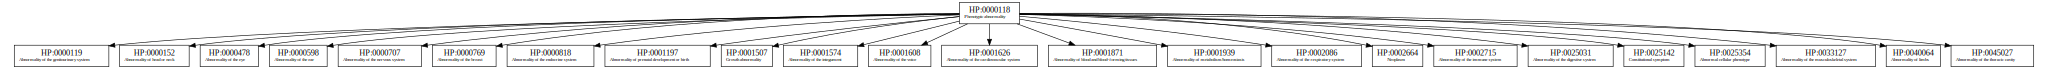

In [5]:
g = utils.make_graph_to_depth(hpo.entries_by_id['HP:0000118'], 1)
print(hpo.root.other_tags)
g

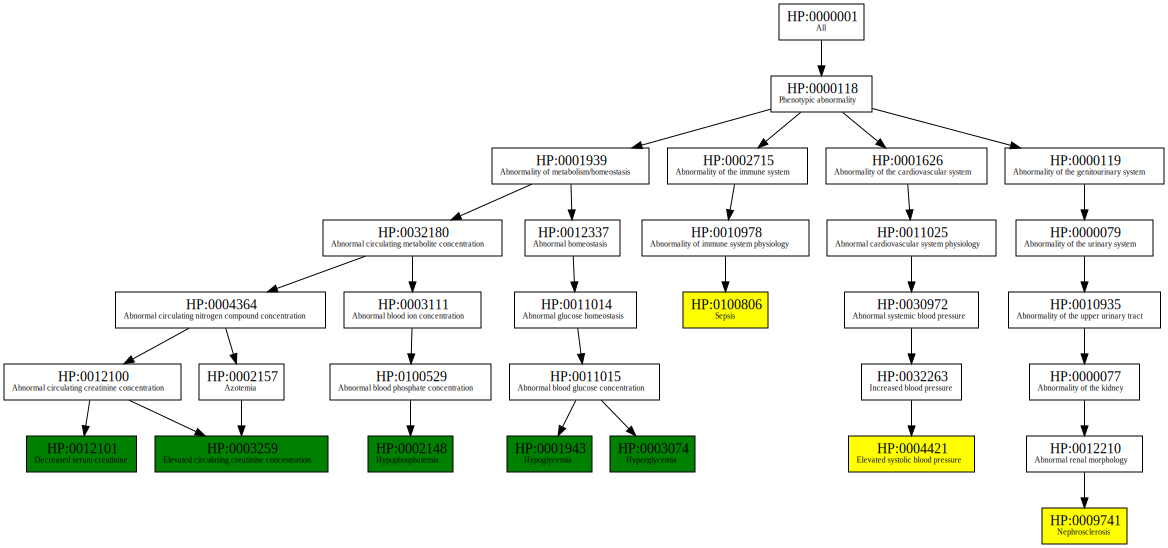

In [6]:
# show a graph to maybe help us understand how we can use the graph
labevents = ['HP:0012101', 'HP:0003259', 'HP:0001943', 'HP:0003074', 'HP:0002148']
diagnoses = ['HP:0100806', 'HP:0004421', 'HP:0009741']
g = utils.make_graph_2(hpo, labevents, diagnoses)
g

In [7]:
labevents = pd.read_csv(LABEVENTS_HPO_PATH)
diagnoses = pd.read_csv(DIAGNOSES_ICD_HPO_PATH)